In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
import pandas as pd
import glob

# Specify the path to the directory containing your CSV files
csv_files = glob.glob(r'D:\Battery DS\01_Battery and Heating data in real driving cycles\1_Model_Output\Measured data\*.csv')

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each CSV file and append its data to the dfs list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df)

# Concatenate all DataFrames in the list
merged_data = pd.concat(dfs, ignore_index=True)

# Save the merged DataFrame to a new CSV file
merged_data.to_csv(r'D:\Battery DS\01_Battery and Heating data in real driving cycles\1_Model_Output\Measured data\merged_file_A.csv', index=False)


In [2]:
Trip_A = pd.read_csv('merged_file_A.csv')

In [3]:
Trip_A.head(10)

Time [s]  Velocity [km/h]  Elevation [m]  Throttle [%]  Motor Torque [Nm]  \
0  0.000000         0.000000     574.000000      0.000000           0.000000   
1  0.100000         0.000000     574.000000      0.000000           0.000000   
2  0.200000         0.000000     574.000000      0.000000           0.000000   
3  0.300000         0.000000     574.000000      0.000000           0.000000   
4  0.400000         0.000000     574.000000      0.000000           0.000000   
5  0.500000         0.000000     574.000000      0.000000           0.000000   
6  0.600000         0.000000     574.000000      0.000000           0.000000   
7  0.700000         0.000000     574.000000      0.000000           0.000000   
8  0.800000         0.000000     574.000000      0.000000           0.380000   
9  0.900000         0.000000     574.000000      0.000000           0.120000   

   Longitudinal Acceleration [m/s^2]  Regenerative Braking Signal   \
0                          -0.030000                      0.000000   
1                           0.000000                      0.000000   
2                          -0.010000                      0.000000   
3                          -0.030000                      0.000000   
4                          -0.030000                      0.000000   
5                          -0.010000                      0.000000   
6                          -0.010000                      0.000000   
7                          -0.030000                      0.000000   
8                          -0.010000                      0.000000   
9                          -0.010000                      0.000000   

   Battery Voltage [V]  Battery Current [A]  Battery Temperature [°C]  \
0           391.400000            -2.200000                        21   
1           391.400000            -2.210000                        21   
2           391.400000            -2.260000                        21   
3           391.400000            -2.300000                        21   
4           391.400000            -2.300000                        21   
5           391.400000            -2.300000                        21   
6           391.400000            -2.300000                        21   
7           391.400000            -2.310000                        21   
8           391.400000            -2.360000                        21   
9           391.400000            -2.370000                        21   

   max. Battery Temperature [°C]  displayed SoC [%]  min. SoC [%]  \
0                      22.000000         100.000000             8   
1                      22.000000         100.000000             8   
2                      22.000000         100.000000             8   
3                      22.000000         100.000000             8   
4                      22.000000         100.000000             8   
5                      22.000000         100.000000             8   
6                      22.000000         100.000000             8   
7                      22.000000         100.000000             8   
8                      22.000000         100.000000             8   
9                      22.000000         100.000000             8   

   max. SoC [%)  Heating Power CAN [kW]  Heating Power LIN [W]  \
0     90.000000                0.000000               0.000000   
1     90.000000                0.000000               0.000000   
2     90.000000                0.000000               0.000000   
3     90.000000                0.000000               0.000000   
4     90.000000                0.000000               0.000000   
5     90.000000                0.000000               0.000000   
6     90.000000                0.000000               0.000000   
7     90.000000                0.000000               0.000000   
8     90.000000                0.000000               0.000000   
9     90.000000                0.000000               0.000000   

   Requested Heating Power [W]  AirCon Power [kW]  Heater Si

In [4]:
Trip_A.shape

(467701, 28)

In [5]:
Trip_A.describe()

Time [s]  Velocity [km/h]  Elevation [m]  Throttle [%]  \
count 467701.000000    467701.000000  467701.000000 467701.000000   
mean     866.334627        43.272401     556.289827     29.079428   
std      622.070003        32.950911      27.677411     17.050224   
min        0.000000         0.000000     479.000000      0.000000   
25%      365.300000        18.060000     538.000000     16.350000   
50%      757.300000        39.000000     559.000000     33.550000   
75%     1261.900000        63.046880     574.320000     42.194050   
max     3164.400000       151.590000     665.000000     99.630000   

       Motor Torque [Nm]  Longitudinal Acceleration [m/s^2]  \
count      467701.000000                      467701.000000   
mean            9.479543                           0.004469   
std            35.696305                           0.655660   
min           -88.000000                          -6.210000   
25%            -1.580000                          -0.230000   
50%             6.350000                          -0.010000   
75%            21.500000                           0.230000   
max           249.500000                           4.380000   

       Regenerative Braking Signal   Battery Voltage [V]  Battery Current [A]  \
count                 467701.000000        467701.000000        467701.000000   
mean                       0.066494           382.859037           -15.407201   
std                        0.249064             6.599943            36.536080   
min                        0.000000           349.410000          -395.180000   
25%                        0.000000           379.710000           -25.700000   
50%                        0.000000           384.160000            -8.680000   
75%                        0.000000           387.610000            -1.134090   
max                        1.000000           394.758520           143.530000   

       Battery Temperature [°C]  max. Battery Temperature [°C]  \
count             467701.000000                  467701.000000   
mean                  22.356784                      22.925856   
std                    3.853811                       3.917076   
min                   16.000000                      17.000000   
25%                   19.000000                      20.000000   
50%                   22.000000                      22.000000   
75%                   26.000000                      27.000000   
max                   32.000000                      60.900000   

       displayed SoC [%]  min. SoC [%]  max. SoC [%)  Heating Power CAN [kW]  \
count      467701.000000 467701.000000 467701.000000           467701.000000   
mean           84.038845      8.000000     89.765151                0.701079   
std            12.902260      0.000000      0.249541                1.629493   
min            34.000000      8.000000     89.500000                0.000000   
25%            76.500000      8.000000     89.500000                0.000000   
50%            86.000000      8.000000     90.000000                0.000000   
75%            94.000000      8.000000     90.000000                0.000000   
max           100.000000      8.000000     90.000000                7.040000   

       Heating Power LIN [W]  Requested Heating Power [W]  AirCon Power [kW]  \
count          157114.000000                467701.000000      467701.000000   
mean              235.921273                   540.249621           0.360110   
std               896.299850                  1669.616809           0.492217   
min                 0.000000                     0.000000           0.000000   
25%                 0.000000                     0.000000           0.000000   
50%                 0.000000                     0.000000           0.213930   
75%                 0.000000                     0.000000           0.520000   
max              7015.000000                  7000.000000           3.320000   

       Heater Signal  Heater Voltage [V]  Heater Curre

In [6]:
Trip_A.columns

Index(['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
       'Regenerative Braking Signal ', 'Battery Voltage [V]',
       'Battery Current [A]', 'Battery Temperature [°C]',
       'max. Battery Temperature [°C]', 'displayed SoC [%]', 'min. SoC [%]',
       'max. SoC [%)', 'Heating Power CAN [kW]', 'Heating Power LIN [W]',
       'Requested Heating Power [W]', 'AirCon Power [kW]', 'Heater Signal',
       'Heater Voltage [V]', 'Heater Current [A]', 'Ambient Temperature [°C]',
       'Coolant Temperature Heatercore [°C]',
       'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]',
       'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]',
       'SoC [%]'],
      dtype='object')

In [7]:
Trip_A.dtypes

Time [s]                               float64
Velocity [km/h]                        float64
Elevation [m]                          float64
Throttle [%]                           float64
Motor Torque [Nm]                      float64
Longitudinal Acceleration [m/s^2]      float64
Regenerative Braking Signal            float64
Battery Voltage [V]                    float64
Battery Current [A]                    float64
Battery Temperature [°C]                 int64
max. Battery Temperature [°C]          float64
displayed SoC [%]                      float64
min. SoC [%]                             int64
max. SoC [%)                           float64
Heating Power CAN [kW]                 float64
Heating Power LIN [W]                  float64
Requested Heating Power [W]            float64
AirCon Power [kW]                      float64
Heater Signal                            int64
Heater Voltage [V]                     float64
Heater Current [A]                     float64
Ambient Tempe

In [8]:
Trip_A.isnull().sum()

Time [s]                                    0
Velocity [km/h]                             0
Elevation [m]                               0
Throttle [%]                                0
Motor Torque [Nm]                           0
Longitudinal Acceleration [m/s^2]           0
Regenerative Braking Signal                 0
Battery Voltage [V]                         0
Battery Current [A]                         0
Battery Temperature [°C]                    0
max. Battery Temperature [°C]               0
displayed SoC [%]                           0
min. SoC [%]                                0
max. SoC [%)                                0
Heating Power CAN [kW]                      0
Heating Power LIN [W]                  310587
Requested Heating Power [W]                 0
AirCon Power [kW]                           0
Heater Signal                               0
Heater Voltage [V]                     310587
Heater Current [A]                     310587
Ambient Temperature [°C]          

In [9]:
Trip_A = Trip_A.drop('Heating Power LIN [W]', axis =1);

Trip_A = Trip_A.drop('Heater Voltage [V]', axis =1);

Trip_A = Trip_A.drop('Heater Current [A]', axis =1);

Trip_A = Trip_A.drop('Coolant Temperature Heatercore [°C]', axis =1);

Trip_A = Trip_A.drop('Coolant Temperature Inlet [°C]', axis =1)

In [10]:
Trip_A.shape

(467701, 23)

In [11]:
Trip_A.isnull().sum()

Time [s]                                  0
Velocity [km/h]                           0
Elevation [m]                             0
Throttle [%]                              0
Motor Torque [Nm]                         0
Longitudinal Acceleration [m/s^2]         0
Regenerative Braking Signal               0
Battery Voltage [V]                       0
Battery Current [A]                       0
Battery Temperature [°C]                  0
max. Battery Temperature [°C]             0
displayed SoC [%]                         0
min. SoC [%]                              0
max. SoC [%)                              0
Heating Power CAN [kW]                    0
Requested Heating Power [W]               0
AirCon Power [kW]                         0
Heater Signal                             0
Ambient Temperature [°C]                  0
Requested Coolant Temperature [°C]    19829
Heat Exchanger Temperature [°C]           0
Cabin Temperature Sensor [°C]             0
SoC [%]                         

In [12]:
Trip_A.fillna(Trip_A.mean(), inplace=True)

In [13]:
Trip_A.isnull().sum()

Time [s]                              0
Velocity [km/h]                       0
Elevation [m]                         0
Throttle [%]                          0
Motor Torque [Nm]                     0
Longitudinal Acceleration [m/s^2]     0
Regenerative Braking Signal           0
Battery Voltage [V]                   0
Battery Current [A]                   0
Battery Temperature [°C]              0
max. Battery Temperature [°C]         0
displayed SoC [%]                     0
min. SoC [%]                          0
max. SoC [%)                          0
Heating Power CAN [kW]                0
Requested Heating Power [W]           0
AirCon Power [kW]                     0
Heater Signal                         0
Ambient Temperature [°C]              0
Requested Coolant Temperature [°C]    0
Heat Exchanger Temperature [°C]       0
Cabin Temperature Sensor [°C]         0
SoC [%]                               0
dtype: int64

In [14]:
plt.figure(figsize = (15,8))

Trip_A.boxplot()

plt.title("Distribution of All Numeric Variable", fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

In [15]:
Q1 = Trip_A.quantile(0.25)

Q3 = Trip_A.quantile(0.75)

IQR = Q3 - Q1

Trip_A = Trip_A [~((Trip_A < (Q1 - 1.5 * IQR)) | (Trip_A > (Q3 + 1.5 * IQR))).any(axis=1)]

Trip_A.shape

(146484, 23)

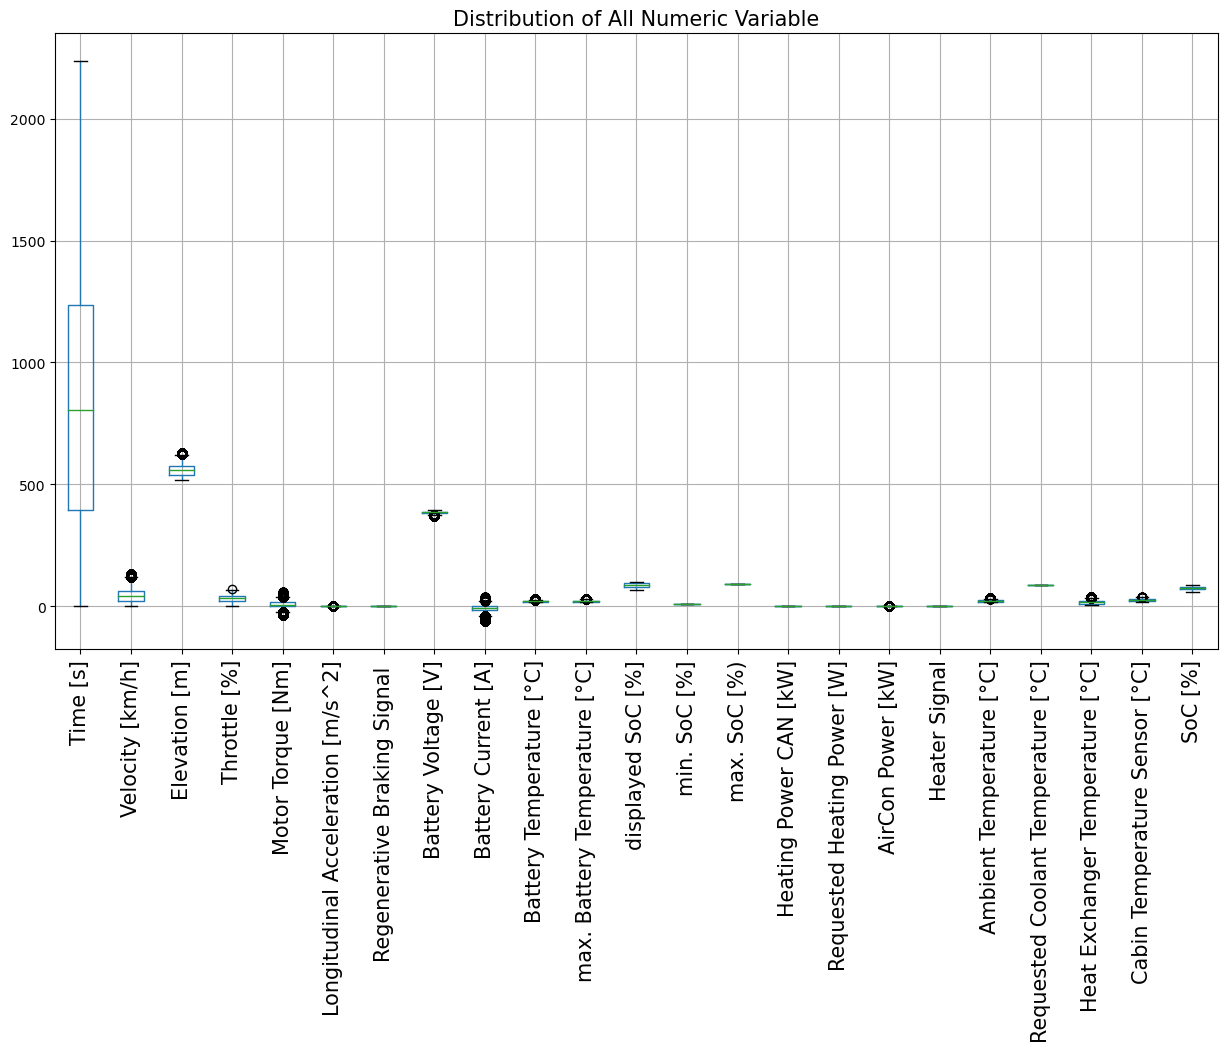

In [16]:
plt.figure(figsize = (15,8))

Trip_A.boxplot()

plt.title("Distribution of All Numeric Variable", fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

In [17]:
df_target = Trip_A['SoC [%]']

df_feature = Trip_A.drop('SoC [%]', axis= 1)

In [18]:
from sklearn.preprocessing import StandardScaler

X_Scaler = StandardScaler()


num_scaled = X_Scaler.fit_transform(df_feature)

df_num_scaled = pd.DataFrame(num_scaled, columns = df_feature.columns)

y = (df_target - df_target.mean()) / df_target.std()

In [19]:
X = df_num_scaled

X.head()

Time [s]  Velocity [km/h]  Elevation [m]  Throttle [%]  Motor Torque [Nm]  \
0 -1.648729        -1.392774       0.932766     -1.866591          -0.450130   
1 -1.648532        -1.392774       0.932766     -1.866591          -0.450130   
2 -1.648335        -1.392774       0.932766     -1.866591          -0.450130   
3 -1.648138        -1.392774       0.932766     -1.866591          -0.450130   
4 -1.647941        -1.392774       0.932766     -1.866591          -0.450130   

   Longitudinal Acceleration [m/s^2]  Regenerative Braking Signal   \
0                           0.676611                      0.000000   
1                           0.709352                      0.000000   
2                           0.840318                      0.000000   
3                           0.873059                      0.000000   
4                           0.774835                      0.000000   

   Battery Voltage [V]  Battery Current [A]  Battery Temperature [°C]  \
0             0.594991             0.516024                  1.316160   
1             0.594991             0.516024                  1.316160   
2             0.594991             0.516024                  1.316160   
3             0.594991             0.516024                  1.316160   
4             0.594991             0.513499                  1.316160   

   max. Battery Temperature [°C]  displayed SoC [%]  min. SoC [%]  \
0                       1.430911           0.334176      0.000000   
1                       1.430911           0.334176      0.000000   
2                       1.430911           0.334176      0.000000   
3                       1.430911           0.334176      0.000000   
4                       1.430911           0.334176      0.000000   

   max. SoC [%)  Heating Power CAN [kW]  Requested Heating Power [W]  \
0      1.245930                0.000000                     0.000000   
1      1.245930                0.000000                     0.000000   
2      1.245930                0.000000                     0.000000   
3      1.245930                0.000000                     0.000000   
4      1.245930                0.000000                     0.000000   

   AirCon Power [kW]  Heater Signal  Ambient Temperature [°C]  \
0           0.364321       0.000000                  0.678971   
1           0.364321       0.000000                  0.678971   
2           0.364321       0.000000                  0.678971   
3           0.364321       0.000000                  0.678971   
4           0.364321       0.000000                  0.678971   

   Requested Coolant Temperature [°C]  Heat Exchanger Temperature [°C]  \
0                            0.000000                        -0.176587   
1                            0.000000                        -0.176587   
2                            0.000000                        -0.176587   
3                            0.000000                        -0.176587   
4                            0.000000                        -0.176587   

   Cabin Temperature Sensor [°C]  
0                      -0.672215  
1                      -0.672215  
2                      -0.672215  
3                      -0.672215  
4                      -0.672215

In [20]:
y.head(5)

30926   0.084292
30927   0.084292
30928   0.084292
30929   0.084292
30930   0.084292
Name: SoC [%], dtype: float64

In [21]:
y.shape

(146484,)

In [22]:
X.shape

(146484, 22)

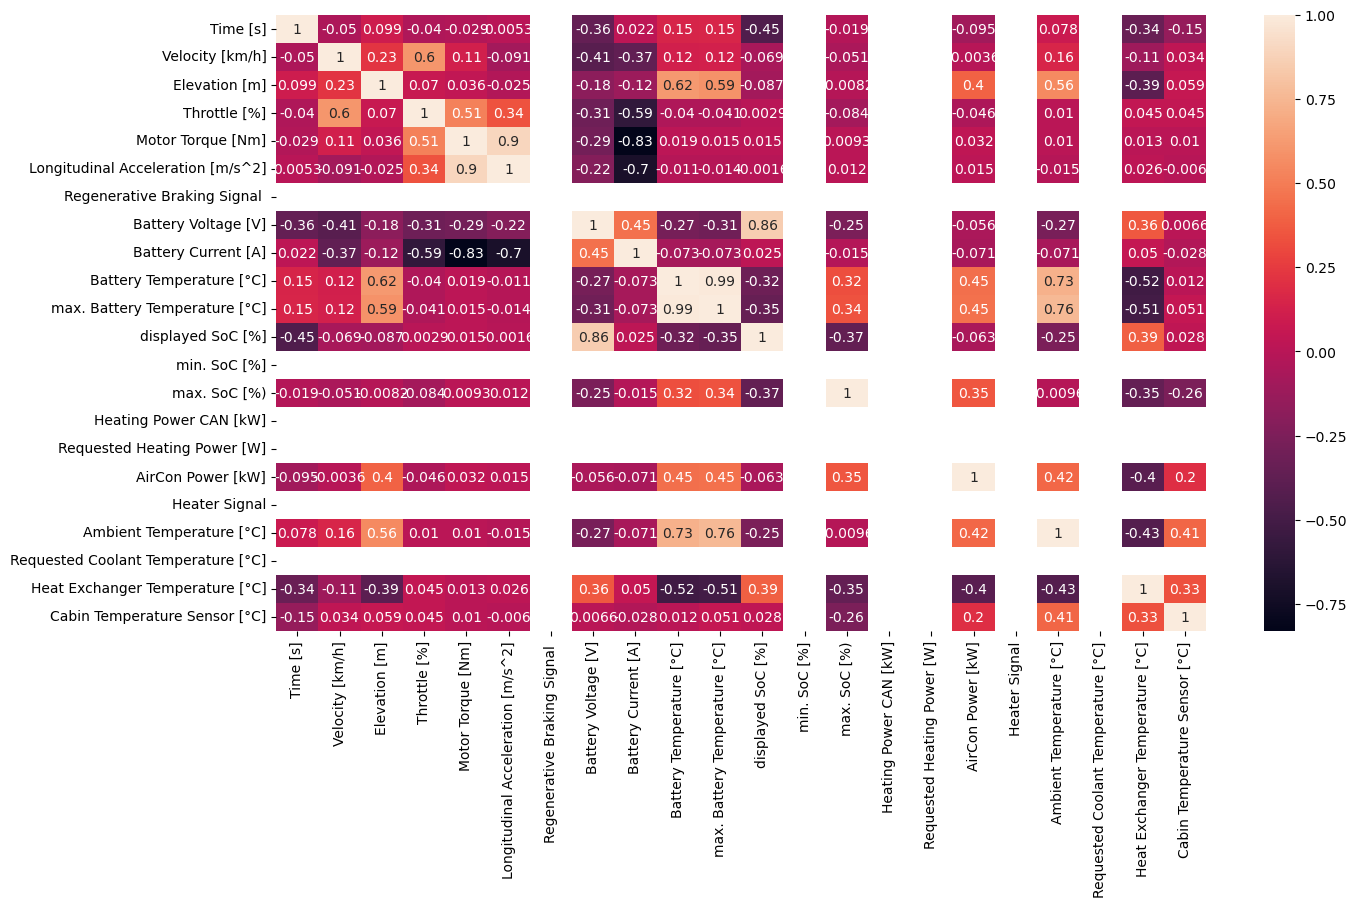

In [23]:
plt.figure(figsize = (15,8))

sns.heatmap(X.corr(), annot = True, annot_kws = {"size":10})

plt.yticks(rotation = 'horizontal', fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

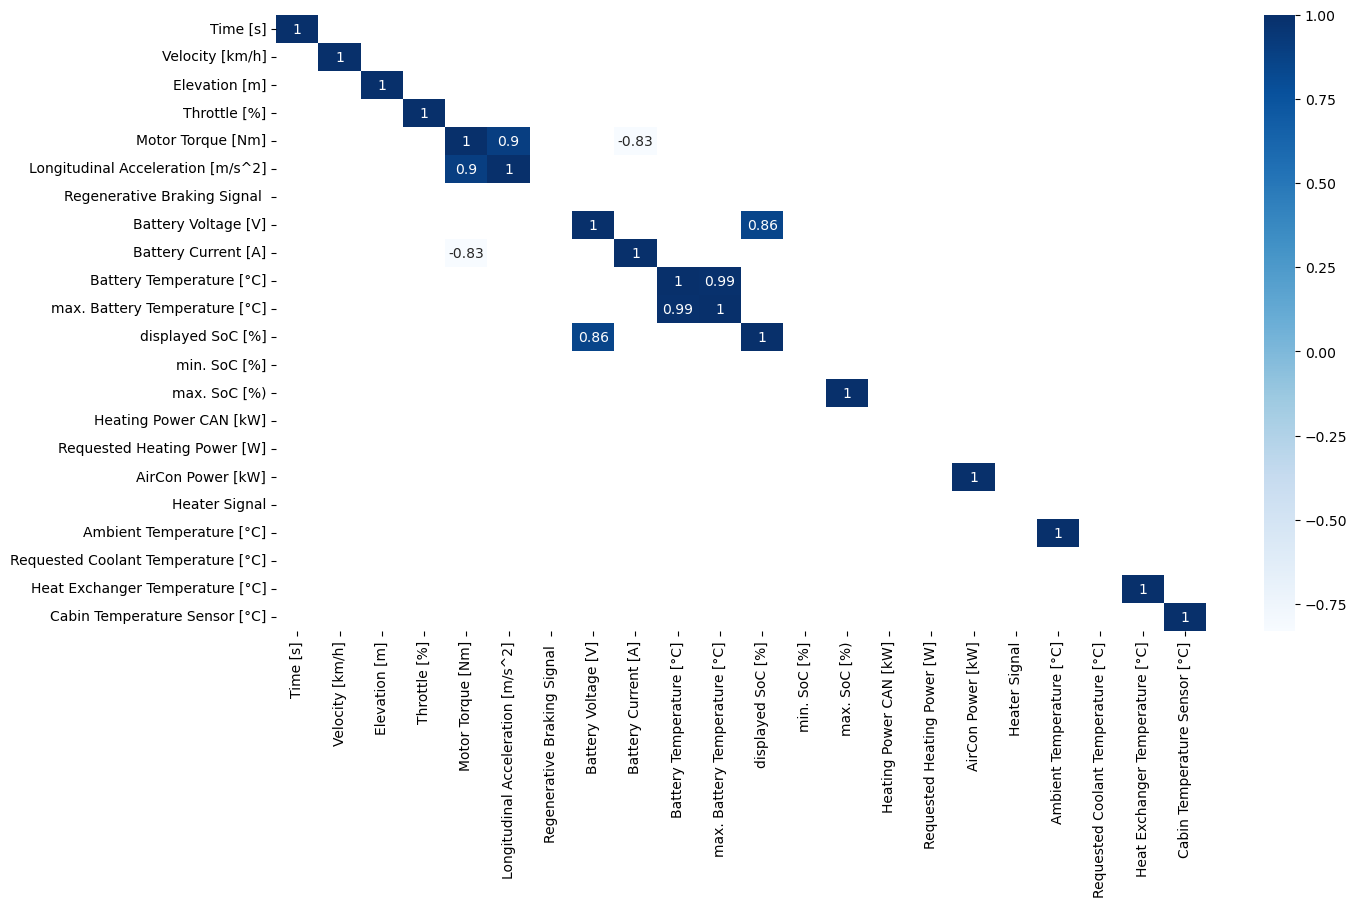

In [24]:
plt.figure(figsize = (15,8))

sns.heatmap(X.corr()[np.abs(X.corr()) > 0.8], annot = True, annot_kws= {'size': 10}, cmap = 'Blues')

plt.yticks(rotation ="horizontal", fontsize = 10)
plt.xticks(fontsize = 10)

plt.show()

In [25]:
df_num = X.select_dtypes(include=[np.number])

df_num.head()

Time [s]  Velocity [km/h]  Elevation [m]  Throttle [%]  Motor Torque [Nm]  \
0 -1.648729        -1.392774       0.932766     -1.866591          -0.450130   
1 -1.648532        -1.392774       0.932766     -1.866591          -0.450130   
2 -1.648335        -1.392774       0.932766     -1.866591          -0.450130   
3 -1.648138        -1.392774       0.932766     -1.866591          -0.450130   
4 -1.647941        -1.392774       0.932766     -1.866591          -0.450130   

   Longitudinal Acceleration [m/s^2]  Regenerative Braking Signal   \
0                           0.676611                      0.000000   
1                           0.709352                      0.000000   
2                           0.840318                      0.000000   
3                           0.873059                      0.000000   
4                           0.774835                      0.000000   

   Battery Voltage [V]  Battery Current [A]  Battery Temperature [°C]  \
0             0.594991             0.516024                  1.316160   
1             0.594991             0.516024                  1.316160   
2             0.594991             0.516024                  1.316160   
3             0.594991             0.516024                  1.316160   
4             0.594991             0.513499                  1.316160   

   max. Battery Temperature [°C]  displayed SoC [%]  min. SoC [%]  \
0                       1.430911           0.334176      0.000000   
1                       1.430911           0.334176      0.000000   
2                       1.430911           0.334176      0.000000   
3                       1.430911           0.334176      0.000000   
4                       1.430911           0.334176      0.000000   

   max. SoC [%)  Heating Power CAN [kW]  Requested Heating Power [W]  \
0      1.245930                0.000000                     0.000000   
1      1.245930                0.000000                     0.000000   
2      1.245930                0.000000                     0.000000   
3      1.245930                0.000000                     0.000000   
4      1.245930                0.000000                     0.000000   

   AirCon Power [kW]  Heater Signal  Ambient Temperature [°C]  \
0           0.364321       0.000000                  0.678971   
1           0.364321       0.000000                  0.678971   
2           0.364321       0.000000                  0.678971   
3           0.364321       0.000000                  0.678971   
4           0.364321       0.000000                  0.678971   

   Requested Coolant Temperature [°C]  Heat Exchanger Temperature [°C]  \
0                            0.000000                        -0.176587   
1                            0.000000                        -0.176587   
2                            0.000000                        -0.176587   
3                            0.000000                        -0.176587   
4                            0.000000                        -0.176587   

   Cabin Temperature Sensor [°C]  
0                      -0.672215  
1                      -0.672215  
2                      -0.672215  
3                      -0.672215  
4                      -0.672215

In [26]:
df_num.shape

(146484, 22)

In [27]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

# create a column of variable names
vif["Features"] = df_num.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

VIF_Factor                            Features
0    57.630461       max. Battery Temperature [°C]
1    52.864911            Battery Temperature [°C]
2    36.638178                 Battery Voltage [V]
3    29.082883                   displayed SoC [%]
4     9.733611                 Battery Current [A]
5     9.141540                   Motor Torque [Nm]
6     6.388500   Longitudinal Acceleration [m/s^2]
7     6.083667            Ambient Temperature [°C]
8     4.607141                     Velocity [km/h]
9     3.051488     Heat Exchanger Temperature [°C]
10    2.691083       Cabin Temperature Sensor [°C]
11    2.572426                        Throttle [%]
12    2.251638                       Elevation [m]
13    2.240067                        max. SoC [%)
14    1.965373                   AirCon Power [kW]
15    1.580334                            Time [s]
16         NaN        Regenerative Braking Signal 
17         NaN                        min. SoC [%]
18         NaN              Heating Power CAN [kW]
19         NaN         Requested Heating Power [W]
20         NaN                       Heater Signal
21         NaN  Requested Coolant Temperature [°C]

In [28]:
df_num.columns

Index(['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
       'Regenerative Braking Signal ', 'Battery Voltage [V]',
       'Battery Current [A]', 'Battery Temperature [°C]',
       'max. Battery Temperature [°C]', 'displayed SoC [%]', 'min. SoC [%]',
       'max. SoC [%)', 'Heating Power CAN [kW]', 'Requested Heating Power [W]',
       'AirCon Power [kW]', 'Heater Signal', 'Ambient Temperature [°C]',
       'Requested Coolant Temperature [°C]', 'Heat Exchanger Temperature [°C]',
       'Cabin Temperature Sensor [°C]'],
      dtype='object')

In [29]:
df_num = df_num.drop('Regenerative Braking Signal ', axis =1);

df_num = df_num.drop('Heating Power CAN [kW]', axis =1);

df_num = df_num.drop('Requested Heating Power [W]', axis =1);

df_num = df_num.drop('Heater Signal', axis =1);

df_num = df_num.drop('Requested Coolant Temperature [°C]', axis =1);

df_num = df_num.drop('min. SoC [%]', axis =1)

In [30]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

# create a column of variable names
vif["Features"] = df_num.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

VIF_Factor                           Features
0    57.630461      max. Battery Temperature [°C]
1    52.864911           Battery Temperature [°C]
2    36.638178                Battery Voltage [V]
3    29.082883                  displayed SoC [%]
4     9.733611                Battery Current [A]
5     9.141540                  Motor Torque [Nm]
6     6.388500  Longitudinal Acceleration [m/s^2]
7     6.083667           Ambient Temperature [°C]
8     4.607141                    Velocity [km/h]
9     3.051488    Heat Exchanger Temperature [°C]
10    2.691083      Cabin Temperature Sensor [°C]
11    2.572426                       Throttle [%]
12    2.251638                      Elevation [m]
13    2.240067                       max. SoC [%)
14    1.965373                  AirCon Power [kW]
15    1.580334                           Time [s]

In [31]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(df_num.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

    # create a column of variable names
    vif["Features"] = df_num.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_num = df_num.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor                           Features
0     1.563277                           Time [s]
1     2.438903                    Velocity [km/h]
2     2.006671                      Elevation [m]
3     2.401399                       Throttle [%]
4     9.135978                  Motor Torque [Nm]
5     6.384733  Longitudinal Acceleration [m/s^2]
6     4.373085                Battery Current [A]
7     3.936285           Battery Temperature [°C]
8     1.789520                  displayed SoC [%]
9     2.059415                       max. SoC [%)
10    1.963481                  AirCon Power [kW]
11    4.733217           Ambient Temperature [°C]
12    2.898119    Heat Exchanger Temperature [°C]
13    2.573276      Cabin Temperature Sensor [°C]


In [32]:
X = df_num

In [33]:
X.columns

Index(['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
       'Battery Current [A]', 'Battery Temperature [°C]', 'displayed SoC [%]',
       'max. SoC [%)', 'AirCon Power [kW]', 'Ambient Temperature [°C]',
       'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]'],
      dtype='object')

In [34]:
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state= 10, test_size= 0.2)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (117187, 14)
X_test (29297, 14)
y_train (117187,)
y_test (29297,)


In [35]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

MLR_train = sm.OLS(y_train, X_train).fit()
print(MLR_train.summary())

                                 OLS Regression Results                                
Dep. Variable:                SoC [%]   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          1.196e+06
Date:                Thu, 11 Jan 2024   Prob (F-statistic):                        0.00
Time:                        10:21:13   Log-Likelihood:                      1.2499e+05
No. Observations:              117187   AIC:                                 -2.499e+05
Df Residuals:                  117173   BIC:                                 -2.498e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

**Interpretation:** The model with the interaction variable explains a 99.3% variation in the target variable. Thus, adding the VIF to the model with significant variabels increased the R-squared from 0.989 to 0.993.

The Durbin-Watson test is used to check the autocorrelation between the residuals.

If the Durbin-Watson test statistic is near to 2: no autocorrelation
If the Durbin-Watson test statistic is between 0 and 2: positive autocorrelation
If the Durbin-Watson test statistic is between 2 and 4: negative autocorrelation

**The summary output shows that the value of the test statistic is near to 2 (=2.011) which means there is no autocorrelation.**

The Jarque-Bera test is used to check the normality of the residuals. Here, the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.

The 'Cond. No' (6.91) represents the Condition Number (CN) which is used to check the multicollinearity.

If CN < 100: no multicollinearity
If CN is between 100 and 1000: moderate multicollinearity
If CN > 1000: severe multicollinearity

**Thus, it can be seen that there is no multicollinearity in the data.**

In [36]:
y_pred = MLR_train.predict(X_test)

In [37]:
y_pred.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

prediction = pd.DataFrame()

prediction["Test_variable"] = y_test

prediction["Predicted"] = y_pred

prediction.head(10)

Test_variable  Predicted
0      -1.189335  -1.238469
1      -0.297796  -0.204410
2       0.239958   0.216207
3      -0.538370  -0.532276
4      -0.326099  -0.185538
5       1.513585   1.538315
6       1.315465   1.227020
7       0.706955   0.653983
8      -0.778944  -0.759180
9       1.032437   0.913578

### Linear Relationship between Independent and Dependent Variable 

An assumption of linear regression is that it should be linear in the parameter. To check the linearity we plot a graph of residuals and each independent variable. If the plot shows no specific pattern then we can conclude the presence of linearity.

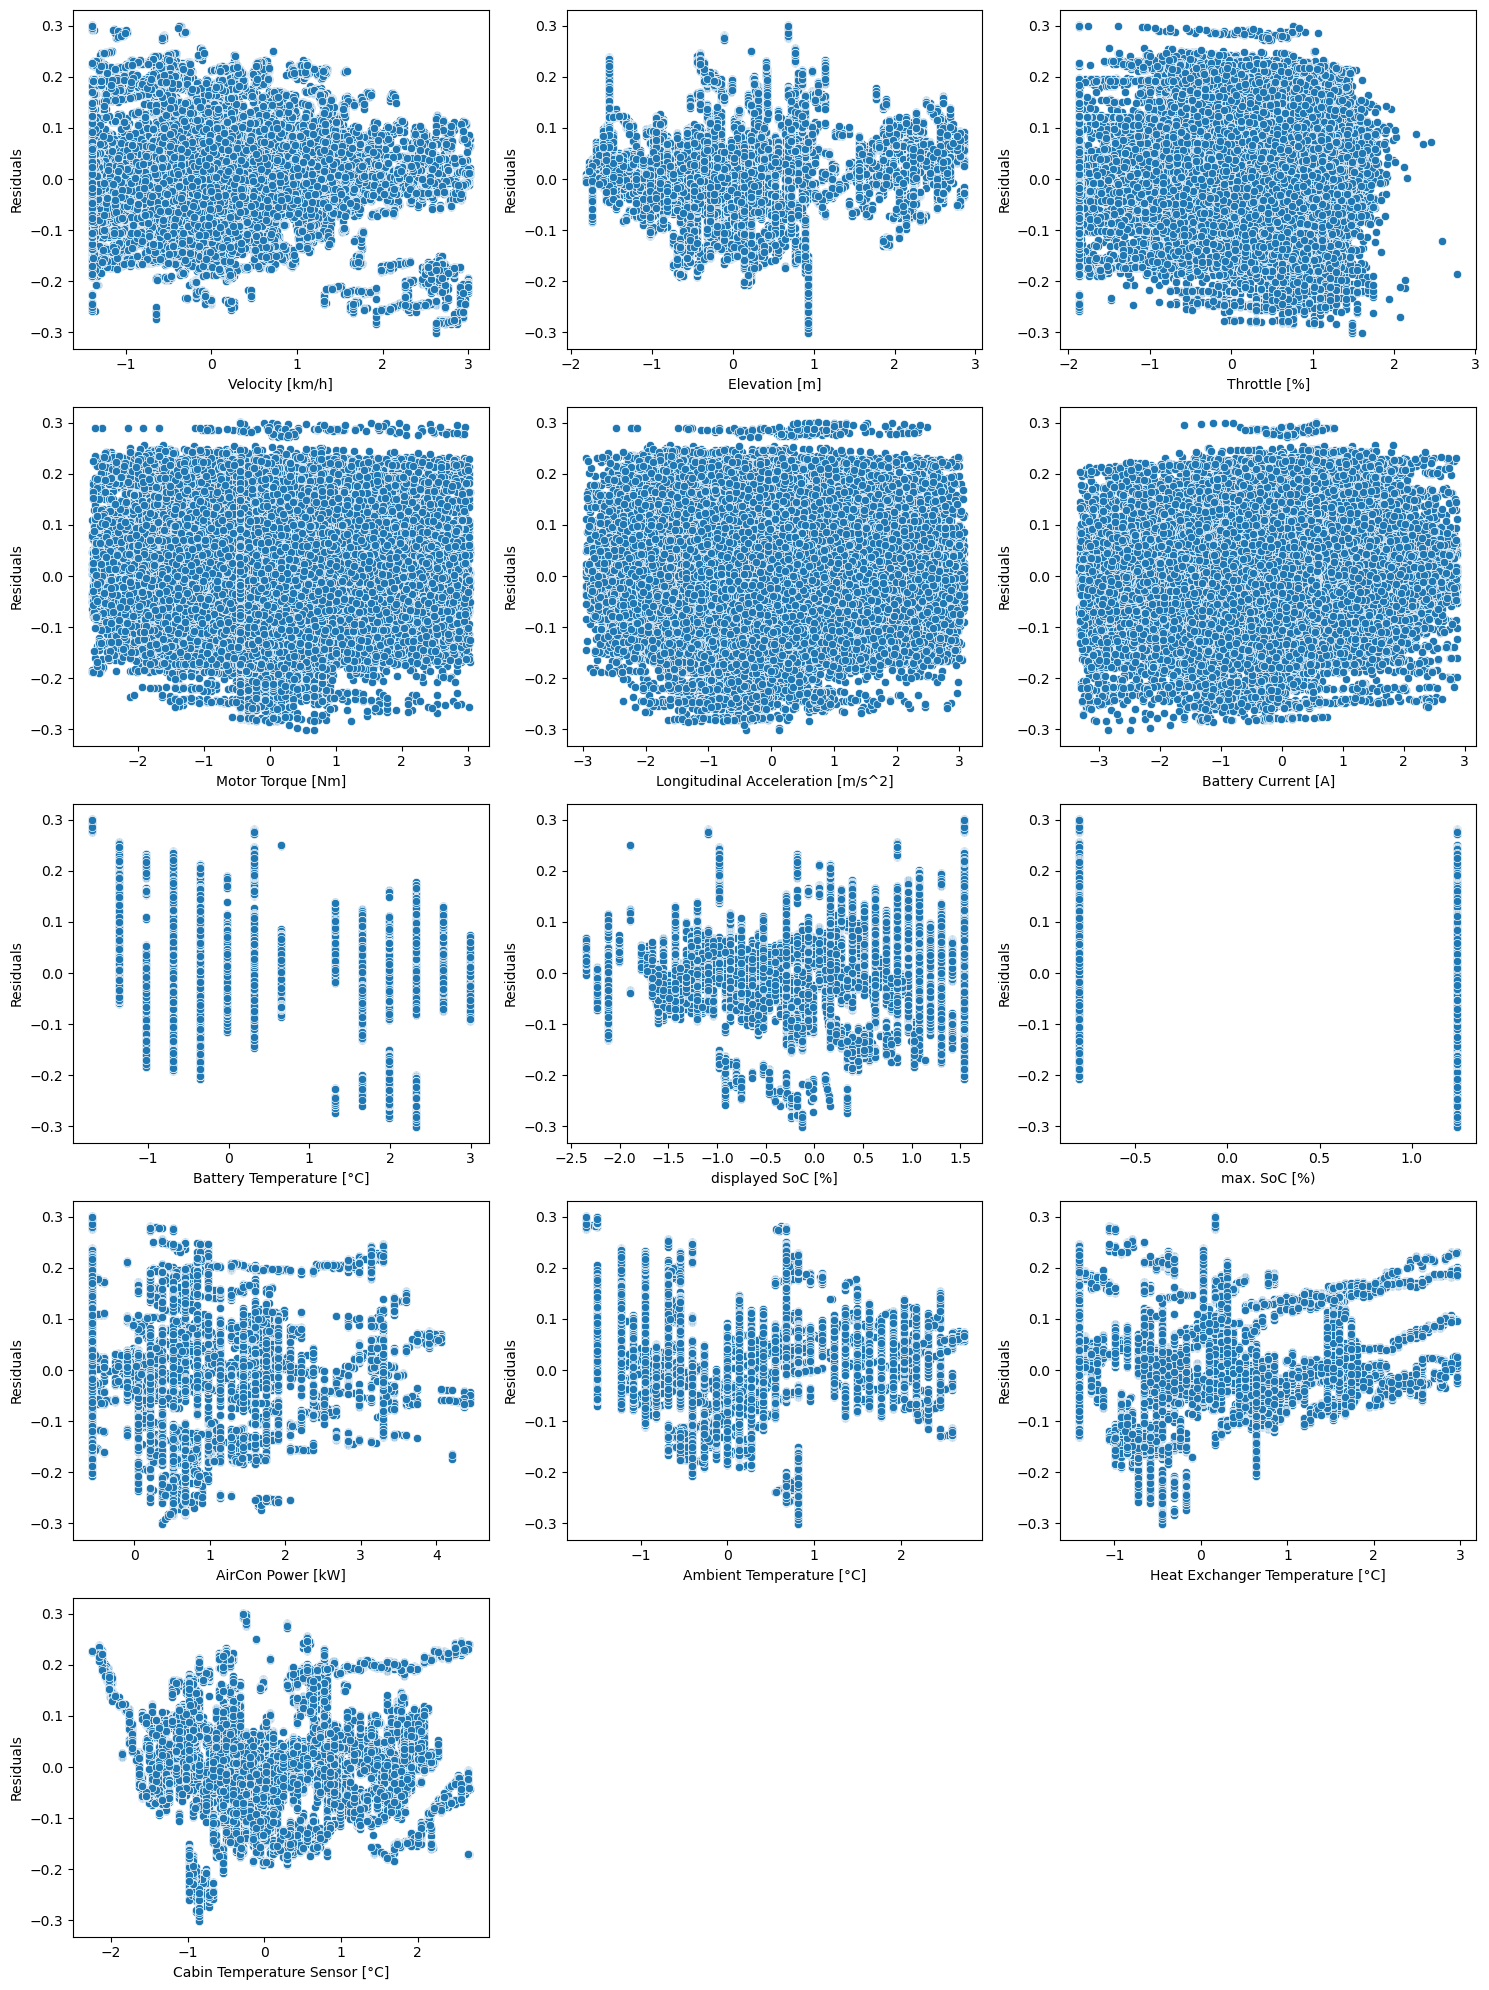

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming MLR_train.resid represents the residuals of the model 
# and X_train contains the predictor variables (excluding the intercept)

# Number of independent variables (excluding intercept)
num_variables = 13

# Set up the subplots
num_cols = 3  # Adjust the number of columns for subplot arrangement
num_rows = (num_variables - 1) // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Use a for loop to create scatter plots for residuals and each independent variable
for i, variable in enumerate(X_train.columns[1:num_variables + 1]):  # Exclude intercept
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(x=X_train[variable], y=MLR_train.resid, ax=axes[row, col])
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel('Residuals')

# Hide empty subplots if any
for i in range(num_variables, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## Autocorrelation

We can check the correlation between the residuals using the Durbin-Watson test. The value of the test statistic ranges from 0 to 4. The test statistic value near to 2, represents no autocorrelation. The value of the test statistic between 0 and 2 implies positive autocorrelation and the value between 2 and 4 implies negative autocorrelation.

Print the summary of the model with significant variables to check the autocorrelation.

In [39]:
print(MLR_train.summary())

                                 OLS Regression Results                                
Dep. Variable:                SoC [%]   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          1.196e+06
Date:                Thu, 11 Jan 2024   Prob (F-statistic):                        0.00
Time:                        10:21:18   Log-Likelihood:                      1.2499e+05
No. Observations:              117187   AIC:                                 -2.499e+05
Df Residuals:                  117173   BIC:                                 -2.498e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

**Interpretation:** From the above summary, we can observe that the value obtained from the Durbin-Watson test statistic is close to 2 (= 2.011). Thus, we conclude that there is no autocorrelation.

### Heteroskedasticity

If the residuals have constant variance across different values of the predicted values, then it is known as Homoskedasticity. The absence of homoskedasticity is known as, heteroskedasticity. One of the assumptions of linear regression is that heteroskedasticity should not be present. Let us study two different tests to check the presence of heteroskedasticity.

Breusch-Pagan is one of the tests for detecting heteroskedasticity in the residuals.
The test hypothesis for the Breusch-Pagan test is given as:

**Ho: There is homoscedasticity present in the data**

**H1: There is a heteroscedasticity present in the data**

In [40]:
X_train_with_const = sm.add_constant(X_train)

# Fit your multiple linear regression model with the updated exogenous variables (including the constant term)
MLR_train_res = sm.OLS(y_train, X_train_with_const).fit()

print(MLR_train_res.summary())


                            OLS Regression Results                            
Dep. Variable:                SoC [%]   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.196e+06
Date:                Thu, 11 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:21:18   Log-Likelihood:             1.2499e+05
No. Observations:              117187   AIC:                        -2.499e+05
Df Residuals:                  117172   BIC:                        -2.498e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [41]:
# Perform the Breusch-Pagan test with the residuals of the regression model
name = ['f-value', 'p-value']
test = sms.het_breuschpagan(MLR_train_res.resid, MLR_train_res.model.exog)

# Retrieve and print the test results
result = lzip(name, test[2:])
print(result)

[('f-value', 2038.1877924570394), ('p-value', 0.0)]


**Interpretation:** We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.

### Tests for Normality

As per the assumptions of linear regression, residuals should be normally distributed. If the target variable is normally distributed then the residuals are also normally distributed, thus we check the normality only for the target variable.

Text(0, 0.5, 'Sample Quantiles')

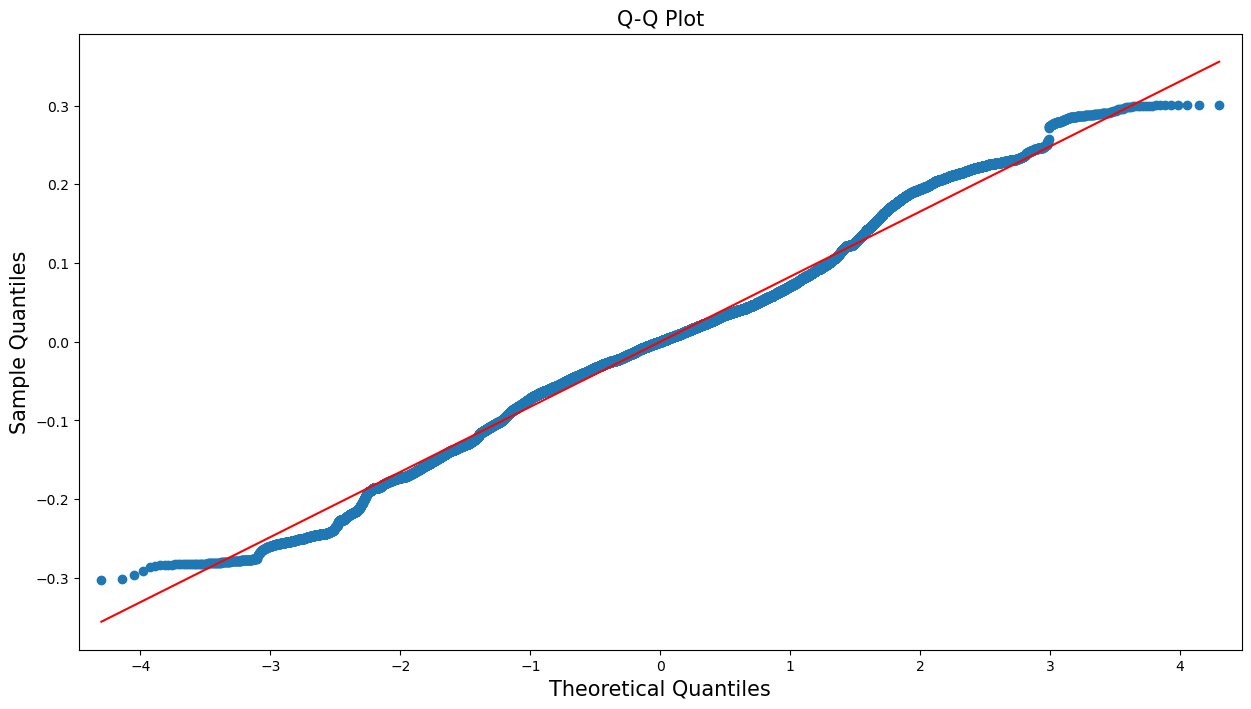

In [42]:
plt.rcParams['figure.figsize'] = [15,8]

qqplot(MLR_train_res.resid, line= 'r')

plt.title("Q-Q Plot", fontsize = 15)

plt.xlabel('Theoretical Quantiles', fontsize=15)
plt.ylabel('Sample Quantiles', fontsize=15)

**Interpretation:** Diagonal line(red line) is the regression line and the blue scatters are the residuals of target variable. As we can see that some of the residuals are away from the diagonal line, so we can conclude that residuals (target variable) does not follow the normal distribution. 

### Shapiro Wilk Test

The Shapiro Wilk test is used to check the normality of the residuals. The test hypothesis is given as:

**Ho: Residuals are normally distributed**

**H1: Residuals are not normally distributed**

In [43]:
stat, p_value = shapiro(MLR_train_res.resid)

print('Test Statistic:', stat)
print('P-Value:', p_value)

Test Statistic: 0.9870815873146057
P-Value: 0.0


**Interpretation:** P-Value is less than 0.05 (0.0), thus it reject null hypothesis. The residuals of the target varible are not 
normally distributed 

## Model Performance 

In [44]:
train_pred = MLR_train.predict(X_train)

test_pred = MLR_train.predict(X_test)

### Mean Square Error (MSE)

In [45]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
print ('Mean square Error on Training set:', mse_train)

mse_test = round(mean_absolute_error(y_test,test_pred),4)
print('Mean Square Error on Testing set:', mse_test)

Mean square Error on Training set: 0.0069
Mean Square Error on Testing set: 0.0624


### Root Mean Square Error

In [46]:
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train),4)

print('Root Mean Square Error on training set:', rmse_train)

mse_test = mean_squared_error(y_test,test_pred)
rmse_test = round(np.sqrt(mse_test),4)

print("Root Mean Square error on test set:", rmse_test)

Root Mean Square Error on training set: 0.0833
Root Mean Square error on test set: 0.0833


### Mean Absolute Error 

In [47]:
mae_train = round(mean_absolute_error(y_train, train_pred),4)

print("Mean absolute Error on training set:", mae_train)

mae_test = round(mean_absolute_error(y_test, test_pred),4)

print("Mean Absolute Error on test set:", mae_test)

Mean absolute Error on training set: 0.0624
Mean Absolute Error on test set: 0.0624


### Mean Absolute Percentage Error

In [48]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [49]:
# calculate the mape using the "mape()" function created above

# calculate the MAPE for the train data
# round the value upto 4 digits using 'round()'
mape_train = round(mape(y_train, train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

# calculate the MAPE for the test data
# round the value upto 4 digits using 'round()'
mape_test = round(mape(y_test, test_pred),4)

# print the MAPE for the test set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  41.5472
Mean Absolute Percentage Error (MAPE) on test set:  454.5266


Skewness of the residuals:  0.07431729862416117


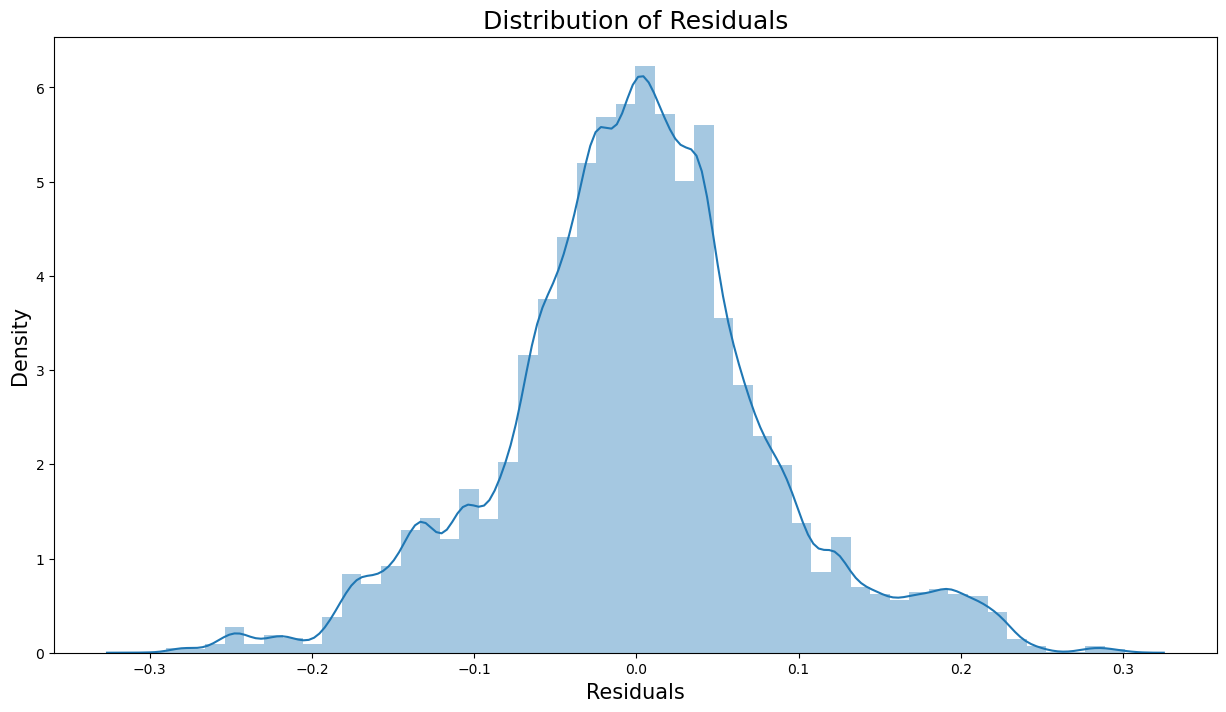

In [50]:
sns.distplot(MLR_train.resid)
plt.xlabel("Residuals", fontsize= 15)
plt.ylabel("Density", fontsize= 15)
plt.title("Distribution of Residuals", fontsize= 18)

print("Skewness of the residuals: ", MLR_train.resid.skew())

## Forward Feature Selection 

This method considers the null model (model with no predictors) in the first step. In the next steps start adding one variable at each step until we run out of the independent variables or the stopping rule is achieved.

The variable is added based on its correlation with the target variable. Such a variable has the least p-value in the model.

In [51]:
# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [52]:
X_train, X_test,y_train,y_test = train_test_split(X,y, random_state=20, test_size=0.2)

In [53]:
# Instantiate the LinearRegression class
linreg = LinearRegression()

# Use the instantiated linreg object in feature selection
linreg_forward = sfs(estimator=linreg, k_features=12, forward=True,
                     verbose=2, scoring='r2')

# Fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished

[2024-01-11 10:21:20] Features: 1/12 -- score: 0.9844396177733075[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.5s finished

[2024-01-11 10:21:21] Features: 2/12 -- score: 0.9872779798989294[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.6s finished

[2024-01-11 10:21:22] Features: 3/12 -- score: 0.9914324344629968[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [54]:
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]', 'Battery Current [A]', 'Battery Temperature [°C]', 'displayed SoC [%]', 'max. SoC [%)', 'AirCon Power [kW]', 'Ambient Temperature [°C]', 'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]')

R-Squared:  0.9930622368429314


In [55]:
# Instantiate the LinearRegression class
linreg = LinearRegression()

# Use the instantiated linreg object in feature selection
linreg_forward = sfs(estimator=linreg, k_features='best', forward=True,
                     verbose=2, scoring='r2')

# Fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished

[2024-01-11 10:21:28] Features: 1/14 -- score: 0.9844396177733075[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.6s finished

[2024-01-11 10:21:29] Features: 2/14 -- score: 0.9872779798989294[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.6s finished

[2024-01-11 10:21:29] Features: 3/14 -- score: 0.9914324344629968[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [56]:
# printing the selected feature names when k_features = 'best'
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Battery Current [A]', 'Battery Temperature [°C]', 'displayed SoC [%]', 'max. SoC [%)', 'AirCon Power [kW]', 'Ambient Temperature [°C]', 'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]')

R-Squared:  0.9930651468296683


In [57]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step backward feature selection
# pass the regression model to 'estimator'
# pass number of required features to 'k_features'. 'best' means that a best possible subset will be selected 
# 'forward=False' performs backward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_backward = sfs(estimator = linreg, k_features = 'best', forward = False,
                     verbose = 2, scoring = 'r2')

# fit the backward elimination on training data using fit()
sfs_backward = linreg_backward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.8s finished

[2024-01-11 10:21:37] Features: 13/1 -- score: 0.9930641882696273[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.6s finished

[2024-01-11 10:21:39] Features: 12/1 -- score: 0.9930617304614268[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.3s finished

[2024-01-11 10:21:40] Features: 11/1 -- score: 0.9930587132718529[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [58]:
# print the selected feature names when k_features = 'best'
print('Features selelected using backward elimination are: ')
print(sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_backward.k_score_)

Features selelected using backward elimination are: 
('Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Battery Current [A]', 'Battery Temperature [°C]', 'displayed SoC [%]', 'max. SoC [%)', 'AirCon Power [kW]', 'Ambient Temperature [°C]', 'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]')

R-Squared:  0.9930651468296683


## Recursive Feature Elimination (RFE)

It is the process that returns the significant features in the dataset by recursively removing the less significant feature subsets.

In [59]:
# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 14)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
       'Battery Current [A]', 'Battery Temperature [°C]', 'displayed SoC [%]',
       'max. SoC [%)', 'AirCon Power [kW]', 'Ambient Temperature [°C]',
       'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]'],
      dtype='object')


In [60]:
# store the X_train with significant variables in new_X_train
new_X_train = X_train[['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
       'Battery Current [A]', 'Battery Temperature [°C]', 'displayed SoC [%]',
       'max. SoC [%)', 'AirCon Power [kW]', 'Ambient Temperature [°C]',
       'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]']]

# initiate linear regression
linreg = LinearRegression()

# build the model using new_X_train and y_train
linreg.fit(new_X_train, y_train)

# check the score
linreg.score(new_X_train, y_train)

0.9930675765458955

# Cross Validation¶

### K-Fold Cross Validation

K-Fold cross validation is where a given dataset is divided into K folds where at some stage each fold is used as a test set.

In [61]:
kf = KFold(n_splits= 5)

def get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k,y_train_k)
    return model.score(X_test_k, y_test_k)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=20)

In [63]:
scores= []

for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k, y_train_k, y_test_k = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
   
    # call the function 'get_scores()' and append the scores in the list 'scores'
    scores.append(get_score(LinearRegression(), X_train_k, X_test_k, y_train_k, y_test_k)) 
    
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.9930387478744799, 0.9929621202841143, 0.9930867559101899, 0.9930454376352531, 0.9932156992382797]

Minimum score obtained:  0.993
Maximum score obtained:  0.9932
Average score obtained:  0.9931


### K-fold Cross Validation 

In [64]:
# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing linear regression
# pass the X_train and y_train sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the scoring parameter e.g. 'r2' for r-squared, 'neg_mean_squared_error' for mean squared error (negative)
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'r2')

In [65]:
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.99303875 0.99296212 0.99308676 0.99304544 0.9932157 ]

Minimum score obtained:  0.993
Maximum score obtained:  0.9932
Average score obtained:  0.9931


## Leave One Out Cross Validation (LOOCV)

It is a process in which the model is trained on the training dataset, with the exception of only one data point, which is used to test the model. This method increases the variance, as only one data point is used for testing. LOOCV can be time consuming as k is equal to the number of observations.

In LOOCV, the estimates from each fold are highly correlated and their average can have a high level of variance.

In [66]:
X.head()

Time [s]  Velocity [km/h]  Elevation [m]  Throttle [%]  Motor Torque [Nm]  \
0 -1.648729        -1.392774       0.932766     -1.866591          -0.450130   
1 -1.648532        -1.392774       0.932766     -1.866591          -0.450130   
2 -1.648335        -1.392774       0.932766     -1.866591          -0.450130   
3 -1.648138        -1.392774       0.932766     -1.866591          -0.450130   
4 -1.647941        -1.392774       0.932766     -1.866591          -0.450130   

   Longitudinal Acceleration [m/s^2]  Battery Current [A]  \
0                           0.676611             0.516024   
1                           0.709352             0.516024   
2                           0.840318             0.516024   
3                           0.873059             0.516024   
4                           0.774835             0.513499   

   Battery Temperature [°C]  displayed SoC [%]  max. SoC [%)  \
0                  1.316160           0.334176      1.245930   
1                  1.316160           0.334176      1.245930   
2                  1.316160           0.334176      1.245930   
3                  1.316160           0.334176      1.245930   
4                  1.316160           0.334176      1.245930   

   AirCon Power [kW]  Ambient Temperature [°C]  \
0           0.364321                  0.678971   
1           0.364321                  0.678971   
2           0.364321                  0.678971   
3           0.364321                  0.678971   
4           0.364321                  0.678971   

   Heat Exchanger Temperature [°C]  Cabin Temperature Sensor [°C]  
0                        -0.176587                      -0.672215  
1                        -0.176587                      -0.672215  
2                        -0.176587                      -0.672215  
3                        -0.176587                      -0.672215  
4                        -0.176587                      -0.672215

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [68]:
def get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)                               # fit the model
    return model.score(X_test_k, y_test_k)     

In [69]:
X_train_k.head()

Time [s]  Velocity [km/h]  Elevation [m]  Throttle [%]  \
29810   0.851769        -0.096666       1.892730      0.296019   
66144   0.624074         0.898687       0.014540      0.927737   
42476  -0.511637         0.375905      -0.486310      0.143750   
54388   2.736013        -0.160846      -0.820211      0.841429   
106664  0.667051         1.395443      -0.444573      0.906106   

        Motor Torque [Nm]  Longitudinal Acceleration [m/s^2]  \
29810           -0.294997                          -0.305631   
66144            0.203447                           0.062546   
42476           -0.450130                          -0.927717   
54388            0.440335                           0.938542   
106664           0.139377                          -0.314569   

        Battery Current [A]  Battery Temperature [°C]  displayed SoC [%]  \
29810              0.247808                  2.654780          -1.435531   
66144             -0.476197                 -0.357115           0.733788   
42476              0.600590                 -1.026425          -0.179610   
54388             -0.294934                 -0.691770          -1.435531   
106664            -0.558872                 -0.691770           0.105827   

        max. SoC [%)  AirCon Power [kW]  Ambient Temperature [°C]  \
29810       1.245930           1.326248                  1.631315   
66144      -0.802613          -0.559130                 -1.225715   
42476       1.245930          -0.559130                 -0.817568   
54388       1.245930           0.056504                 -0.817568   
106664     -0.802613          -0.559130                 -0.137323   

        Heat Exchanger Temperature [°C]  Cabin Temperature Sensor [°C]  
29810                         -1.405402                      -0.451880  
66144                          0.233018                      -1.064543  
42476                         -0.040052                      -0.013832  
54388                         -0.381389                      -0.517456  
106664                        -0.859262                       0.028609

In [70]:
y_train_k.head()

188803   -1.231789
327948    0.890923
212377   -0.439310
228851   -1.585575
406056    0.041838
Name: SoC [%], dtype: float64

In [71]:
# create an empty to store the MSE for each model
loocv_rmse = []

# instantiate the LOOCV method 
loocv = LeaveOneOut()

# use the for loop to build the regression model for each cross validation 
# use split() to split the dataset into two subsets; one with (n-1) data points and another with 1 data point
# where, n = total number of observations

for train_index, test_index in loocv.split(X_train):
    # create the train dataset, use iloc[] to retrieve the corresponding observations in train data
    # create the test dataset, use iloc[] to retrieve the corresponding observations in test data
    # # use '\' for stacking the code 
    X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    
    # instantiate the regression model
    linreg = LinearRegression()
    
    # fit the model on training dataset
    linreg.fit(X_train_l, y_train_l)
    
    # calculate MSE using test dataset
    # use predict() to predict the values of target variable
    mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
    
    # calculate the RMSE
    rmse = np.sqrt(mse)
    
    # use append() to add each RMSE to the list 'loocv_rmse'
    loocv_rmse.append(rmse)

In [72]:
# print the minimum rmse from the list
# use 'round()' to round-off the minimum rmse upto 4 digits
# min() returns minimum rmse 
print("\nMinimum rmse obtained: ", round(min(loocv_rmse), 4))

# print the maximum rmse from the list
# use 'round()' to round-off the maximum rmse upto 4 digits
# max() returns maximum rmse 
print("Maximum rmse obtained: ", round(max(loocv_rmse), 4))

# print the average rmse from the list
# use 'round()' to round-off the average rmse upto 4 digits
# np.mean() returns average rmse 
print("Average rmse obtained: ", round(np.mean(loocv_rmse), 4))


Minimum rmse obtained:  0.0
Maximum rmse obtained:  0.3024
Average rmse obtained:  0.0624


# Optimise and Validate 

## Create generalized functions to calculate various metrics for models

### Create a generalized function to calculate the RMSE for train and test set.

In [73]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [74]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

In [75]:
# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)
    
    # calculate the mape using the "mape()" function created above
    # calculate the MAPE for the test data
    mape_test = mape(y_test, test_pred)

    # return the MAPE for the test set
    return(mape_test)

In [76]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model):
    
    # score() returns the R-squared value
    r_sq = model.score(X_train, y_train)
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = X_train.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = X_train.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq, r_sq_adj])

In [77]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

# create a function to update the score card for comparision of the scores from different algorithms
# pass the model name, model build, alpha and l1_ration as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

In [78]:
# define a function to plot a barplot
# pass the model 
def plot_coefficients(model, algorithm_name):
    # create a dataframe of variable names and their corresponding value of coefficients obtained from model
    # 'columns' returns the column names of the dataframe 'X'
    # 'coef_' returns the coefficient of each variable
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})

    # sort the dataframe in descending order
    # 'sort_values' sorts the column based on the values
    # 'ascending = False' sorts the values in the descending order
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)

    # plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
    # pass the data to the parameter, 'sorted_coeff' to plot the barplot
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    
    # add x-axis label
    # set the size of the text using 'fontsize'
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)

    # add y-axis label
    # set the size of the text using 'fontsize'
    plt.ylabel('Features', fontsize = 15)

## Multiple Linear Regression (OLS)

In [79]:
linreg = LinearRegression()

MLR_Model = linreg.fit(X_train, y_train)

MLR_Model.score(X_train,y_train)

0.993050249494527

In [80]:
# print training RMSE
print('RMSE on train set: ', get_train_rmse(MLR_Model))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(MLR_Model))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(MLR_Model) - get_train_rmse(MLR_Model))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.0833
RMSE on test set:  0.0833
Difference between RMSE on train and test set:  0.0


# Gradient Descent

## Stochastic Gradient Descent

The gradient descent method considers all the data points to calculate the values of the parameters at each step. For a very large dataset, this method becomes computationally expensive. To avoid this problem, we use Stochastic Gradient Descent (SGD) which considers a single data point (sample) to perform each iteration. Each sample is randomly selected for performing the iteration.

In [81]:
# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

In [82]:
sgd = SGDRegressor(random_state=10)

linreg_sgd = sgd.fit(X_train, y_train)

print ("RMSE on train set:", get_train_rmse(linreg_sgd))

print("RMSE on test set:", get_test_rmse(linreg_sgd))

RMSE on train set: 0.0833
RMSE on test set: 0.0834


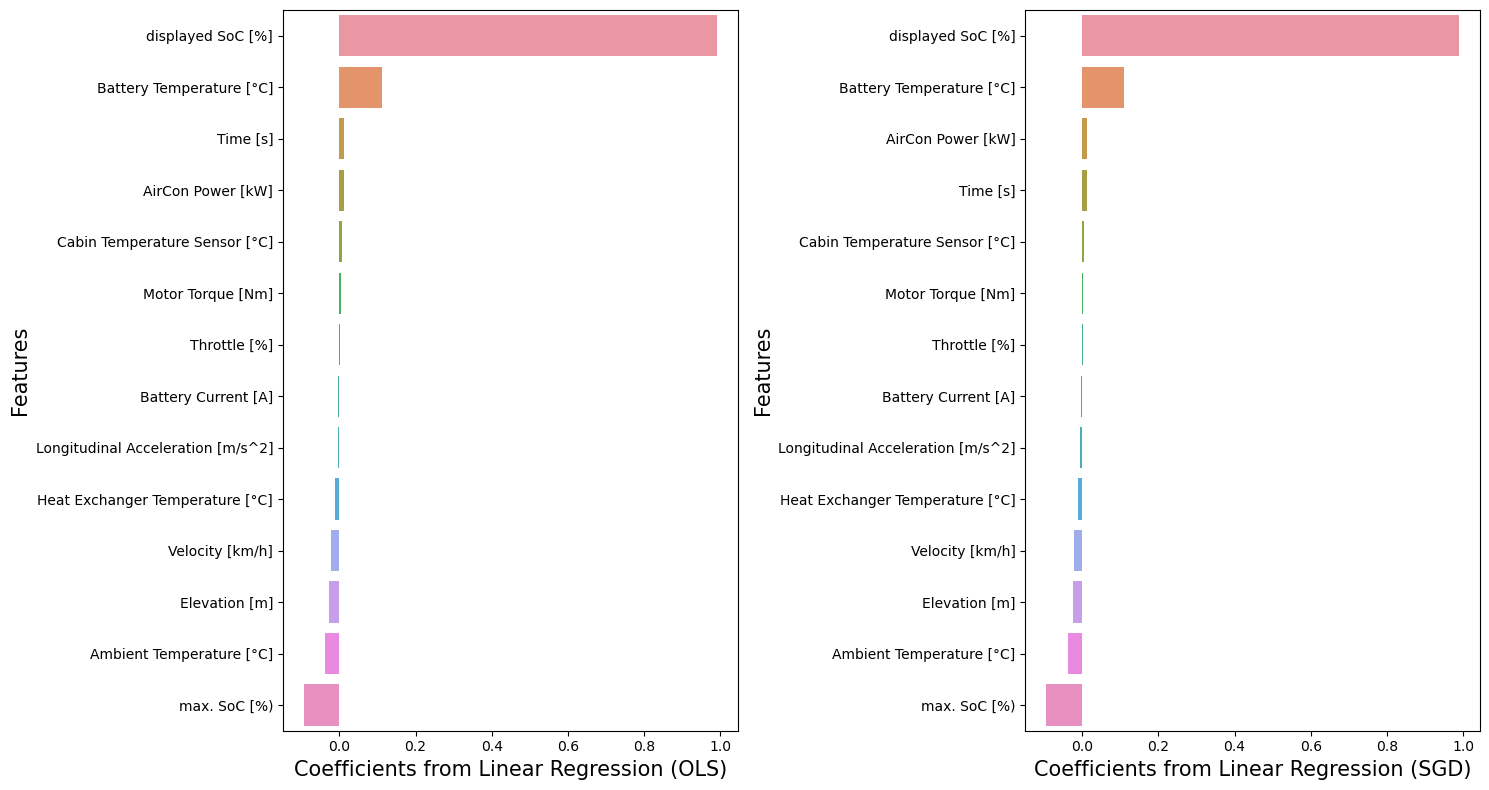

In [83]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_Model, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(linreg_sgd, 'Linear Regression (SGD)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [84]:
train_pred = linreg_sgd.predict(X_train)
test_pred = linreg_sgd.predict(X_test)

In [85]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
print ('Mean square Error on Training set:', mse_train)

mse_test = round(mean_absolute_error(y_test,test_pred),4)
print('Mean Square Error on Testing set:', mse_test)


Mean square Error on Training set: 0.0069
Mean Square Error on Testing set: 0.0625


In [86]:
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train),4)

print('Root Mean Square Error on training set:', rmse_train)

mse_test = mean_squared_error(y_test,test_pred)
rmse_test = round(np.sqrt(mse_test),4)

print("Root Mean Square error on test set:", rmse_test)

Root Mean Square Error on training set: 0.0833
Root Mean Square error on test set: 0.0834


In [87]:
mae_train = round(mean_absolute_error(y_train, train_pred),4)

print("Mean absolute Error on training set:", mae_train)

mae_test = round(mean_absolute_error(y_test, test_pred),4)

print("Mean Absolute Error on test set:", mae_test)


Mean absolute Error on training set: 0.0624
Mean Absolute Error on test set: 0.0625


In [88]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)
# calculate the mape using the "mape()" function created above

# calculate the MAPE for the train data
# round the value upto 4 digits using 'round()'
mape_train = round(mape(y_train, train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

# calculate the MAPE for the test data
# round the value upto 4 digits using 'round()'
mape_test = round(mape(y_test, test_pred),4)

# print the MAPE for the test set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)


Mean Absolute Percentage Error (MAPE) on training set:  42.2554
Mean Absolute Percentage Error (MAPE) on test set:  40.409


In [89]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate number of samples and predictors
n = len(y_train)
p = X.shape[1]  # Assuming X is the feature matrix used

# Calculate Adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("R-Squared vale for Gradient Descent: ", r2)
print("Adj. R-Squared vale for Gradient Descent: ", adjusted_r2)

R-Squared vale for Gradient Descent:  0.9931082961665376
Adj. R-Squared vale for Gradient Descent:  0.9931074727287396


## Regularization

One way to deal with the overfitting problem is by adding the Regularization to the model. It is observed that inflation of the coefficients cause overfitting. To prevent overfitting, it is important to regulate the coefficients by penalizing possible coefficient inflations. Regularization imposes penalties on parameters if they inflate to large values to prevent them from being weighted too heavily. In this section, we will learn about the three regularization techniques:

**Ridge Regression**

**Lasso Regression**

**Elastic Net Regression**

### Ridge Regression

Most of the times our data can show multicollinearity in the variables. To analyze such data we can use Ridge Regression. It uses the L2 norm for regularization.

**Build regression model using Ridge Regression for alpha = 1**

In [102]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run 
ridge = Ridge(alpha = 1, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.0833


In [103]:
train_pred = ridge.predict(X_train)
test_pred = ridge.predict(X_test)

In [104]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
print ('Mean square Error on Training set:', mse_train)

mse_test = round(mean_absolute_error(y_test,test_pred),4)
print('Mean Square Error on Testing set:', mse_test)

Mean square Error on Training set: 0.0069
Mean Square Error on Testing set: 0.0624


In [105]:
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train),4)

print('Root Mean Square Error on training set:', rmse_train)

mse_test = mean_squared_error(y_test,test_pred)
rmse_test = round(np.sqrt(mse_test),4)

print("Root Mean Square error on test set:", rmse_test)

Root Mean Square Error on training set: 0.0833
Root Mean Square error on test set: 0.0833


In [106]:
mae_train = round(mean_absolute_error(y_train, train_pred),4)

print("Mean absolute Error on training set:", mae_train)

mae_test = round(mean_absolute_error(y_test, test_pred),4)

print("Mean Absolute Error on test set:", mae_test)

Mean absolute Error on training set: 0.0624
Mean Absolute Error on test set: 0.0624


In [107]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)
# calculate the mape using the "mape()" function created above

# calculate the MAPE for the train data
# round the value upto 4 digits using 'round()'
mape_train = round(mape(y_train, train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

# calculate the MAPE for the test data
# round the value upto 4 digits using 'round()'
mape_test = round(mape(y_test, test_pred),4)

# print the MAPE for the test set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  41.5565
Mean Absolute Percentage Error (MAPE) on test set:  39.86


In [108]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate number of samples and predictors
n = len(y_train)
p = X.shape[1]  # Assuming X is the feature matrix used

# Calculate Adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("R-Squared vale for Gradient Descent: ", r2)
print("Adj. R-Squared vale for Gradient Descent: ", adjusted_r2)

R-Squared vale for Gradient Descent:  0.9931082961665376
Adj. R-Squared vale for Gradient Descent:  0.9931074727287396


**Ridge regression with alpha = 2**

In [109]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
ridge = Ridge(alpha = 2, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.0833


In [110]:
train_pred = ridge.predict(X_train)
test_pred = ridge.predict(X_test)

In [111]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
print ('Mean square Error on Training set:', mse_train)

mse_test = round(mean_absolute_error(y_test,test_pred),4)
print('Mean Square Error on Testing set:', mse_test)

Mean square Error on Training set: 0.0069
Mean Square Error on Testing set: 0.0624


In [112]:
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train),4)

print('Root Mean Square Error on training set:', rmse_train)

mse_test = mean_squared_error(y_test,test_pred)
rmse_test = round(np.sqrt(mse_test),4)

print("Root Mean Square error on test set:", rmse_test)

Root Mean Square Error on training set: 0.0833
Root Mean Square error on test set: 0.0833


In [113]:
mae_train = round(mean_absolute_error(y_train, train_pred),4)

print("Mean absolute Error on training set:", mae_train)

mae_test = round(mean_absolute_error(y_test, test_pred),4)

print("Mean Absolute Error on test set:", mae_test)

Mean absolute Error on training set: 0.0624
Mean Absolute Error on test set: 0.0624


In [114]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)
# calculate the mape using the "mape()" function created above

# calculate the MAPE for the train data
# round the value upto 4 digits using 'round()'
mape_train = round(mape(y_train, train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

# calculate the MAPE for the test data
# round the value upto 4 digits using 'round()'
mape_test = round(mape(y_test, test_pred),4)

# print the MAPE for the test set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  41.5611
Mean Absolute Percentage Error (MAPE) on test set:  39.8643


In [115]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate number of samples and predictors
n = len(y_train)
p = X.shape[1]  # Assuming X is the feature matrix used

# Calculate Adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("R-Squared vale for Gradient Descent: ", r2)
print("Adj. R-Squared vale for Gradient Descent: ", adjusted_r2)

R-Squared vale for Gradient Descent:  0.9931082961665376
Adj. R-Squared vale for Gradient Descent:  0.9931074727287396


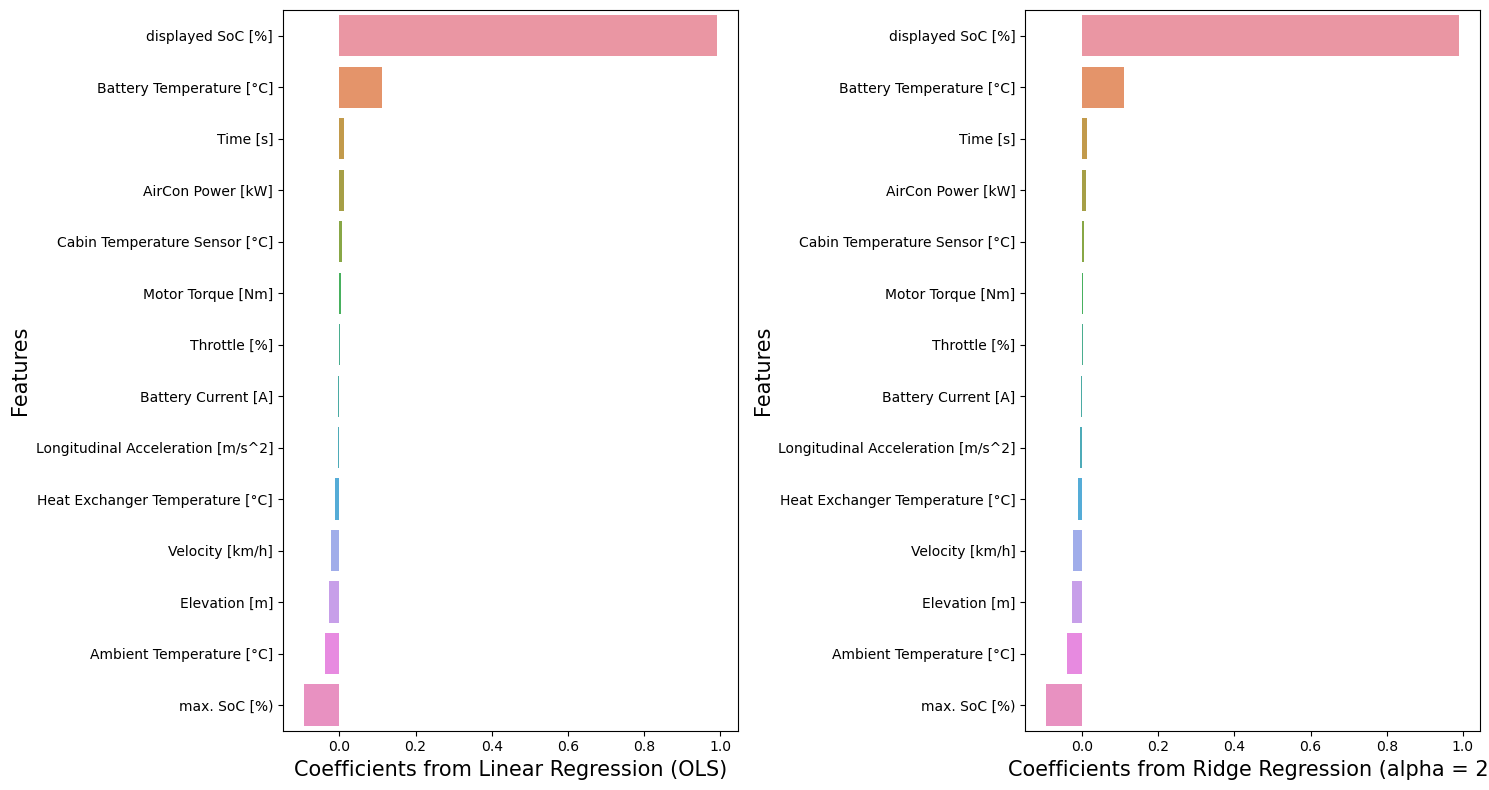

In [92]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_Model, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(ridge, 'Ridge Regression (alpha = 2)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

### Lasso Regression

Lasso regression shrinks the less important variable's coefficient to zero which makes this technique more useful when we are dealing with large number of variables. It is a type of regularization technique that uses L1 norm for regularization.

In [116]:
# use Lasso() to perform lasso regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
lasso = Lasso(alpha = 0.01, max_iter = 500)

# fit the model on train set
lasso.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 0.092


In [117]:
train_pred = lasso.predict(X_train)
test_pred = lasso.predict(X_test)

In [118]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
print ('Mean square Error on Training set:', mse_train)

mse_test = round(mean_absolute_error(y_test,test_pred),4)
print('Mean Square Error on Testing set:', mse_test)

Mean square Error on Training set: 0.0084
Mean Square Error on Testing set: 0.0752


In [119]:
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train),4)

print('Root Mean Square Error on training set:', rmse_train)

mse_test = mean_squared_error(y_test,test_pred)
rmse_test = round(np.sqrt(mse_test),4)

print("Root Mean Square error on test set:", rmse_test)

Root Mean Square Error on training set: 0.0919
Root Mean Square error on test set: 0.092


In [120]:
mae_train = round(mean_absolute_error(y_train, train_pred),4)

print("Mean absolute Error on training set:", mae_train)

mae_test = round(mean_absolute_error(y_test, test_pred),4)

print("Mean Absolute Error on test set:", mae_test)

Mean absolute Error on training set: 0.075
Mean Absolute Error on test set: 0.0752


In [121]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)
# calculate the mape using the "mape()" function created above

# calculate the MAPE for the train data
# round the value upto 4 digits using 'round()'
mape_train = round(mape(y_train, train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

# calculate the MAPE for the test data
# round the value upto 4 digits using 'round()'
mape_test = round(mape(y_test, test_pred),4)

# print the MAPE for the test set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  88.3548
Mean Absolute Percentage Error (MAPE) on test set:  80.2718


In [122]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate number of samples and predictors
n = len(y_train)
p = X.shape[1]  # Assuming X is the feature matrix used

# Calculate Adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("R-Squared vale for Gradient Descent: ", r2)
print("Adj. R-Squared vale for Gradient Descent: ", adjusted_r2)

R-Squared vale for Gradient Descent:  0.9931082961665376
Adj. R-Squared vale for Gradient Descent:  0.9931074727287396


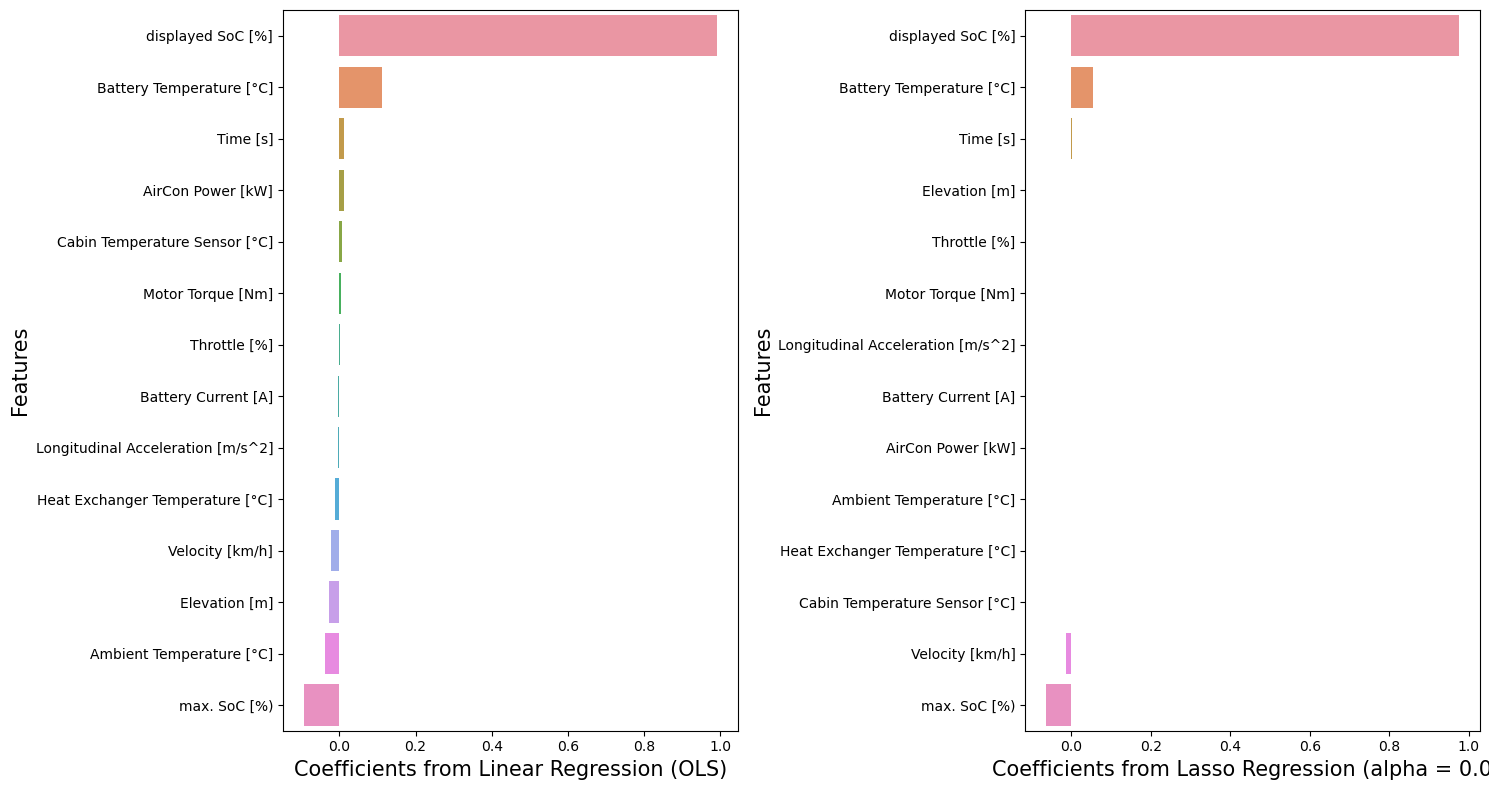

In [94]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_Model, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(lasso, 'Lasso Regression (alpha = 0.01)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [95]:
# create a dataframe to store the variable names and their corresponding coefficient values.
df_lasso_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso.coef_})

# print the variables having the coefficient value equal to zero
# 'to_list()' converts the output to the list type
print('Insignificant variables obtained from Lasso Regression when alpha is 0.01')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list()

Insignificant variables obtained from Lasso Regression when alpha is 0.01


['Elevation [m]',
 'Throttle [%]',
 'Motor Torque [Nm]',
 'Longitudinal Acceleration [m/s^2]',
 'Battery Current [A]',
 'AirCon Power [kW]',
 'Ambient Temperature [°C]',
 'Heat Exchanger Temperature [°C]',
 'Cabin Temperature Sensor [°C]']

### Elastic Net Regression

This technique is a combination of Rigde and Lasso reression techniques. It considers the linear combination of penalties for L1 and L2 regularization.

In [124]:
# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'l1_ratio = 0' performs Ridge regression
# 'l1_ratio = 1' performs Lasso regression
# pass number of iterations to 'max_iter'
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train data
enet.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 0.1364


In [125]:
train_pred = enet.predict(X_train)
test_pred = enet.predict(X_test)

In [126]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
print ('Mean square Error on Training set:', mse_train)

mse_test = round(mean_absolute_error(y_test,test_pred),4)
print('Mean Square Error on Testing set:', mse_test)

Mean square Error on Training set: 0.0183
Mean Square Error on Testing set: 0.1114


In [127]:
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train),4)

print('Root Mean Square Error on training set:', rmse_train)

mse_test = mean_squared_error(y_test,test_pred)
rmse_test = round(np.sqrt(mse_test),4)

print("Root Mean Square error on test set:", rmse_test)

Root Mean Square Error on training set: 0.1353
Root Mean Square error on test set: 0.1364


In [128]:
mae_train = round(mean_absolute_error(y_train, train_pred),4)

print("Mean absolute Error on training set:", mae_train)

mae_test = round(mean_absolute_error(y_test, test_pred),4)

print("Mean Absolute Error on test set:", mae_test)

Mean absolute Error on training set: 0.1103
Mean Absolute Error on test set: 0.1114


In [129]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)
# calculate the mape using the "mape()" function created above

# calculate the MAPE for the train data
# round the value upto 4 digits using 'round()'
mape_train = round(mape(y_train, train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

# calculate the MAPE for the test data
# round the value upto 4 digits using 'round()'
mape_test = round(mape(y_test, test_pred),4)

# print the MAPE for the test set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  88.9419
Mean Absolute Percentage Error (MAPE) on test set:  81.057


In [130]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate number of samples and predictors
n = len(y_train)
p = X.shape[1]  # Assuming X is the feature matrix used

# Calculate Adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("R-Squared vale for Gradient Descent: ", r2)
print("Adj. R-Squared vale for Gradient Descent: ", adjusted_r2)

R-Squared vale for Gradient Descent:  0.9931082961665376
Adj. R-Squared vale for Gradient Descent:  0.9931074727287396


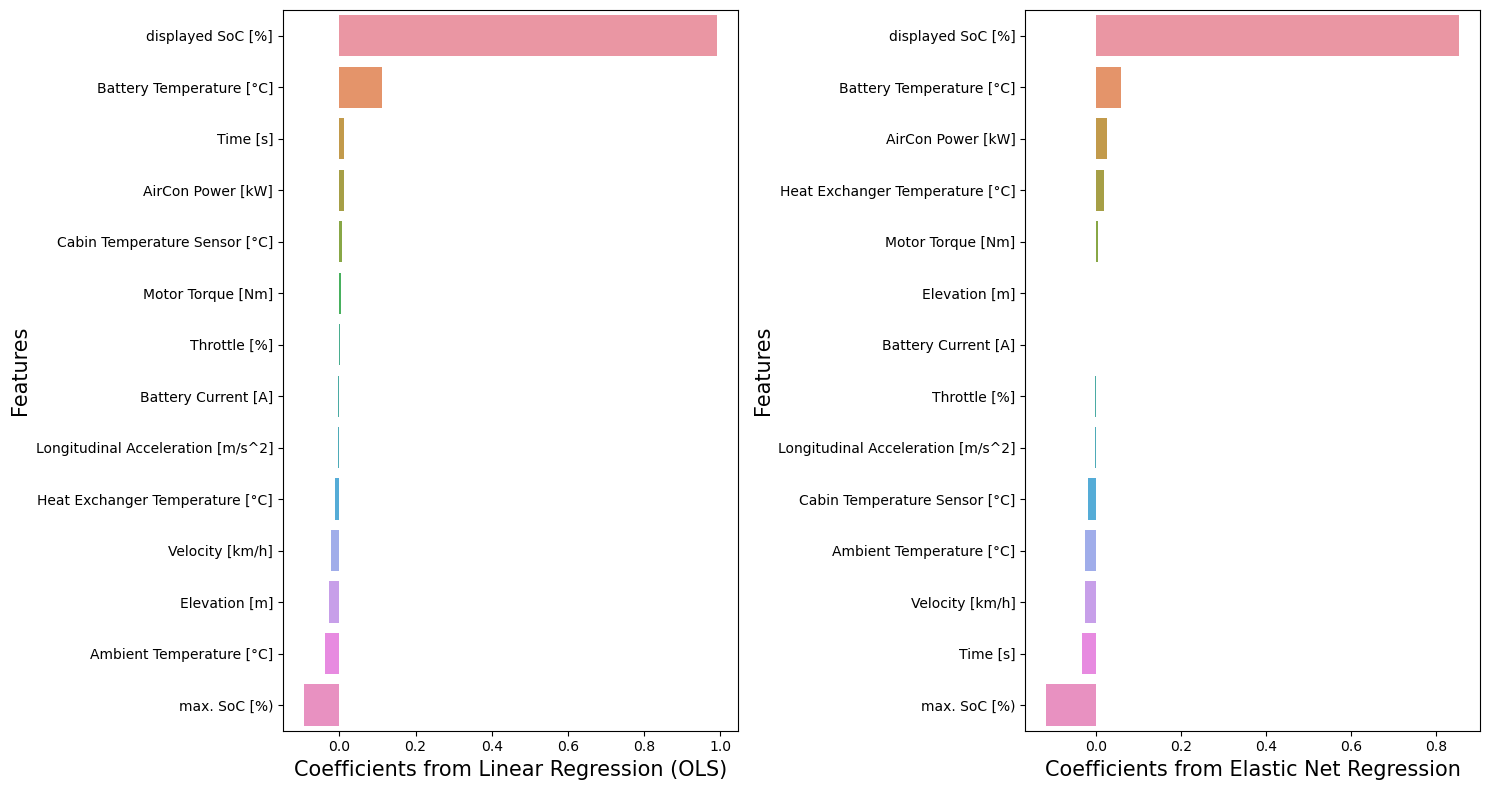

In [97]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(MLR_Model, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(enet, 'Elastic Net Regression')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

### GridSearchCV

Hyperparameters are the parameters in the model that are preset by the user. GridSearch considers all the combinations of hyperparameters and returns the best hyperparameter values. Following are some of the parameters that GridSearchCV takes:

estimator: pass the machine learning algorithm model
param_grid: takes a dictionary having parameter names as keys and list of parameters as values
cv: number of folds for k-fold cross validation

**Find optimal value of alpha for Ridge Regression**

In [131]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

# print the RMSE for test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 0.1} 

RMSE on test set: 0.0833


In [132]:
train_pred = ridge_grid.predict(X_train)
test_pred = ridge_grid.predict(X_test)

In [133]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
print ('Mean square Error on Training set:', mse_train)

mse_test = round(mean_absolute_error(y_test,test_pred),4)
print('Mean Square Error on Testing set:', mse_test)

Mean square Error on Training set: 0.0069
Mean Square Error on Testing set: 0.0624


In [134]:
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train),4)

print('Root Mean Square Error on training set:', rmse_train)

mse_test = mean_squared_error(y_test,test_pred)
rmse_test = round(np.sqrt(mse_test),4)

print("Root Mean Square error on test set:", rmse_test)

Root Mean Square Error on training set: 0.0833
Root Mean Square error on test set: 0.0833


In [135]:
mae_train = round(mean_absolute_error(y_train, train_pred),4)

print("Mean absolute Error on training set:", mae_train)

mae_test = round(mean_absolute_error(y_test, test_pred),4)

print("Mean Absolute Error on test set:", mae_test)

Mean absolute Error on training set: 0.0624
Mean Absolute Error on test set: 0.0624


In [136]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)
# calculate the mape using the "mape()" function created above

# calculate the MAPE for the train data
# round the value upto 4 digits using 'round()'
mape_train = round(mape(y_train, train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

# calculate the MAPE for the test data
# round the value upto 4 digits using 'round()'
mape_test = round(mape(y_test, test_pred),4)

# print the MAPE for the test set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  41.5523
Mean Absolute Percentage Error (MAPE) on test set:  39.8561


In [137]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate number of samples and predictors
n = len(y_train)
p = X.shape[1]  # Assuming X is the feature matrix used

# Calculate Adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("R-Squared vale for Gradient Descent: ", r2)
print("Adj. R-Squared vale for Gradient Descent: ", adjusted_r2)

R-Squared vale for Gradient Descent:  0.9931082961665376
Adj. R-Squared vale for Gradient Descent:  0.9931074727287396


**Find optimal value of alpha for Lasso Regression**

In [140]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     
# 'max_iter':100,500,1000,1500,2000
 
# initiate the lasso regression model 
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 1e-15} 

RMSE on test set: 0.0833


In [141]:
train_pred = lasso_grid.predict(X_train)
test_pred = lasso_grid.predict(X_test)

In [142]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
print ('Mean square Error on Training set:', mse_train)

mse_test = round(mean_absolute_error(y_test,test_pred),4)
print('Mean Square Error on Testing set:', mse_test)

Mean square Error on Training set: 0.0069
Mean Square Error on Testing set: 0.0624


In [143]:
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train),4)

print('Root Mean Square Error on training set:', rmse_train)

mse_test = mean_squared_error(y_test,test_pred)
rmse_test = round(np.sqrt(mse_test),4)

print("Root Mean Square error on test set:", rmse_test)

Root Mean Square Error on training set: 0.0833
Root Mean Square error on test set: 0.0833


In [144]:
mae_train = round(mean_absolute_error(y_train, train_pred),4)

print("Mean absolute Error on training set:", mae_train)

mae_test = round(mean_absolute_error(y_test, test_pred),4)

print("Mean Absolute Error on test set:", mae_test)

Mean absolute Error on training set: 0.0624
Mean Absolute Error on test set: 0.0624


In [145]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)
# calculate the mape using the "mape()" function created above

# calculate the MAPE for the train data
# round the value upto 4 digits using 'round()'
mape_train = round(mape(y_train, train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

# calculate the MAPE for the test data
# round the value upto 4 digits using 'round()'
mape_test = round(mape(y_test, test_pred),4)

# print the MAPE for the test set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  41.5518
Mean Absolute Percentage Error (MAPE) on test set:  39.8557


In [146]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate number of samples and predictors
n = len(y_train)
p = X.shape[1]  # Assuming X is the feature matrix used

# Calculate Adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("R-Squared vale for Gradient Descent: ", r2)
print("Adj. R-Squared vale for Gradient Descent: ", adjusted_r2)

R-Squared vale for Gradient Descent:  0.9931082961665376
Adj. R-Squared vale for Gradient Descent:  0.9931074727287396


**Find optimal value of alpha for Elastic Net Regression**

In [147]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.0001} 

RMSE on test set: 0.0833


In [148]:
train_pred = enet_grid.predict(X_train)
test_pred = enet_grid.predict(X_test)

In [149]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
print ('Mean square Error on Training set:', mse_train)

mse_test = round(mean_absolute_error(y_test,test_pred),4)
print('Mean Square Error on Testing set:', mse_test)

Mean square Error on Training set: 0.0069
Mean Square Error on Testing set: 0.0624


In [150]:
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train),4)

print('Root Mean Square Error on training set:', rmse_train)

mse_test = mean_squared_error(y_test,test_pred)
rmse_test = round(np.sqrt(mse_test),4)

print("Root Mean Square error on test set:", rmse_test)

Root Mean Square Error on training set: 0.0833
Root Mean Square error on test set: 0.0833


In [151]:
mae_train = round(mean_absolute_error(y_train, train_pred),4)

print("Mean absolute Error on training set:", mae_train)

mae_test = round(mean_absolute_error(y_test, test_pred),4)

print("Mean Absolute Error on test set:", mae_test)

Mean absolute Error on training set: 0.0624
Mean Absolute Error on test set: 0.0624


In [152]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)
# calculate the mape using the "mape()" function created above

# calculate the MAPE for the train data
# round the value upto 4 digits using 'round()'
mape_train = round(mape(y_train, train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

# calculate the MAPE for the test data
# round the value upto 4 digits using 'round()'
mape_test = round(mape(y_test, test_pred),4)

# print the MAPE for the test set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  41.6064
Mean Absolute Percentage Error (MAPE) on test set:  39.9063


In [153]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate number of samples and predictors
n = len(y_train)
p = X.shape[1]  # Assuming X is the feature matrix used

# Calculate Adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("R-Squared vale for Gradient Descent: ", r2)
print("Adj. R-Squared vale for Gradient Descent: ", adjusted_r2)

R-Squared vale for Gradient Descent:  0.9931082961665376
Adj. R-Squared vale for Gradient Descent:  0.9931074727287396
